In [3]:
# =========================================================
# EA3 - Machine Learning (Aprendizaje no supervisado)
# Método: K-Means sobre dataset de aplicación (application_.csv)
# Autor/a: <Giselle Aguilera>
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pd.set_option("display.max_columns", 200)


In [4]:
business_understanding = """
1. BUSINESS UNDERSTANDING
-------------------------

En el contexto del proyecto de scoring crediticio, se busca complementar
el modelo supervisado principal (que predice la probabilidad de impago)
con un análisis no supervisado aplicado sobre el mismo conjunto de datos
de clientes.

En este EA3 se utiliza el algoritmo de clustering K-Means sobre el dataset
base de aplicaciones de crédito (application_.csv), que es el mismo que
se usa en el examen.

Objetivos principales del análisis:

- Identificar grupos (clusters) de clientes con características financieras
  y sociodemográficas similares.
- Analizar si estos clusters presentan diferencias en el riesgo de impago,
  medido a partir de la variable TARGET.
- Evaluar si estos segmentos podrían utilizarse para enriquecer el modelo
  supervisado de scoring (por ejemplo, incorporando el número de cluster
  como variable adicional) o para definir políticas diferenciadas por tipo
  de cliente.

Se respetan las recomendaciones del enunciado: el análisis se realiza
sobre el dataset de entrenamiento / base de modelamiento, evitando
cualquier tipo de data leakage desde conjuntos de validación o prueba.
"""

print(business_understanding)



1. BUSINESS UNDERSTANDING
-------------------------

En el contexto del proyecto de scoring crediticio, se busca complementar
el modelo supervisado principal (que predice la probabilidad de impago)
con un análisis no supervisado aplicado sobre el mismo conjunto de datos
de clientes.

En este EA3 se utiliza el algoritmo de clustering K-Means sobre el dataset
base de aplicaciones de crédito (application_.csv), que es el mismo que
se usa en el examen.

Objetivos principales del análisis:

- Identificar grupos (clusters) de clientes con características financieras
  y sociodemográficas similares.
- Analizar si estos clusters presentan diferencias en el riesgo de impago,
  medido a partir de la variable TARGET.
- Evaluar si estos segmentos podrían utilizarse para enriquecer el modelo
  supervisado de scoring (por ejemplo, incorporando el número de cluster
  como variable adicional) o para definir políticas diferenciadas por tipo
  de cliente.

Se respetan las recomendaciones del enunciado:

In [5]:
# =========================================================
# 2. DATA UNDERSTANDING
# =========================================================

# Cargar dataset base de aplicaciones
df = pd.read_csv("application_.csv")

print("Shape del dataset:", df.shape)
df.head()


Shape del dataset: (68324, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68324 entries, 0 to 68323
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(105), int64(1), object(16)
memory usage: 63.6+ MB


In [9]:
df.describe().T.head(15)


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,68324.0,139621.441646,22836.636965,1792.000000,119922.250000,139586.50000,159336.750000,1.792330e+05
TARGET,68323.0,0.080310,0.271774,0.000000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,68323.0,0.418761,0.723950,0.000000,0.000000,0.00000,1.000000,1.100000e+01
AMT_INCOME_TOTAL,68323.0,169695.225858,457532.245579,25650.000000,112500.000000,144000.00000,202500.000000,1.170000e+08
AMT_CREDIT,68323.0,598921.510165,402250.718002,45000.000000,270000.000000,513000.00000,808650.000000,4.050000e+06
AMT_ANNUITY,68318.0,27068.527021,14489.062027,2052.000000,16456.500000,24903.00000,34587.000000,2.580255e+05
AMT_GOODS_PRICE,68268.0,538286.172021,369503.827449,45000.000000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,68323.0,0.020864,0.013767,0.000533,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,68323.0,-16033.597515,4362.716076,-25201.000000,-19663.000000,-15755.00000,-12396.500000,-7.676000e+03
DAYS_EMPLOYED,68323.0,63330.088799,140886.319786,-17531.000000,-2787.000000,-1218.00000,-288.000000,3.652430e+05


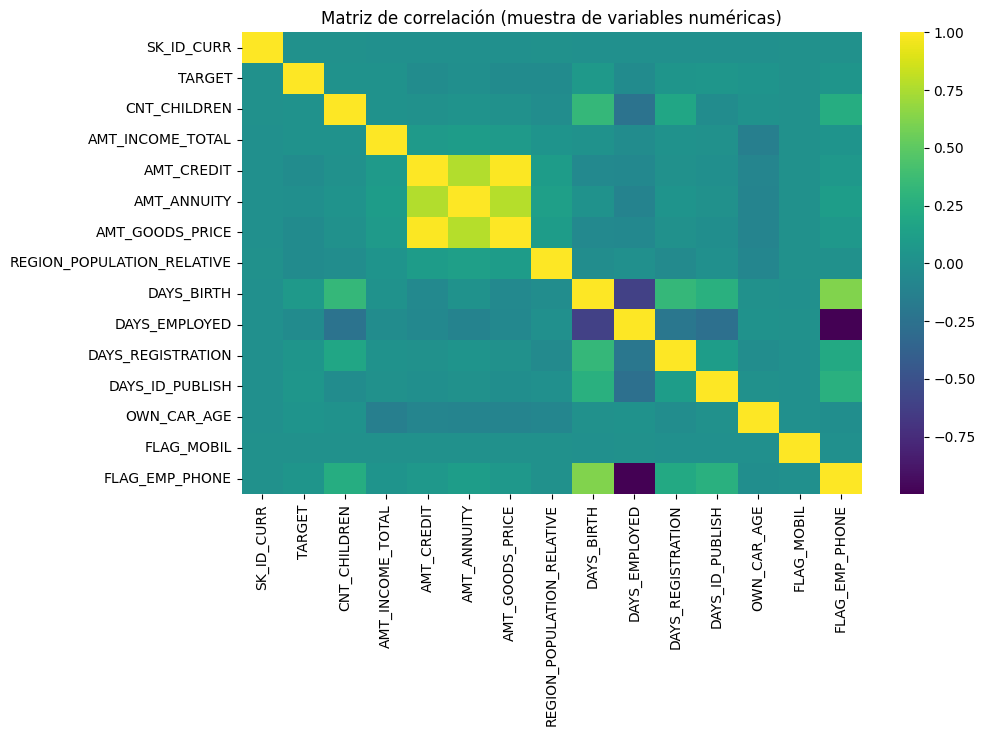

In [10]:
# Tomamos solo algunas columnas numéricas para ver la correlación inicial
numeric_sample = df.select_dtypes(include=[np.number]).iloc[:, :15]

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_sample.corr(), cmap="viridis", annot=False)
plt.title("Matriz de correlación (muestra de variables numéricas)")
plt.show()


In [11]:
# =========================================================
# 3. DATA PREPARATION
# =========================================================

df_prep = df.copy()

# --- Crear edad en años (DAYS_BIRTH viene negativa) ---
df_prep["AGE_YEARS"] = -df_prep["DAYS_BIRTH"] / 365

# Ratios financieros
df_prep["CREDIT_INCOME_RATIO"] = df_prep["AMT_CREDIT"] / df_prep["AMT_INCOME_TOTAL"]
df_prep["ANNUITY_INCOME_RATIO"] = df_prep["AMT_ANNUITY"] / df_prep["AMT_INCOME_TOTAL"]

# Seleccionar variables para clustering (variables básicas)
features = [
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "CNT_CHILDREN",
    "AGE_YEARS",
    "CREDIT_INCOME_RATIO",
    "ANNUITY_INCOME_RATIO"
]

data = df_prep[features].copy()

data.describe().T


,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,68323.0,169695.225858,457532.245579,25650.000000,112500.000000,144000.000000,202500.000000,1.170000e+08
AMT_CREDIT,68323.0,598921.510165,402250.718002,45000.000000,270000.000000,513000.000000,808650.000000,4.050000e+06
AMT_ANNUITY,68318.0,27068.527021,14489.062027,2052.000000,16456.500000,24903.000000,34587.000000,2.580255e+05
AMT_GOODS_PRICE,68268.0,538286.172021,369503.827449,45000.000000,238500.000000,450000.000000,679500.000000,4.050000e+06
CNT_CHILDREN,68323.0,0.418761,0.723950,0.000000,0.000000,0.000000,1.000000,1.100000e+01
AGE_YEARS,68323.0,43.927664,11.952647,21.030137,33.963014,43.164384,53.871233,6.904384e+01
CREDIT_INCOME_RATIO,68323.0,3.961808,2.703855,0.004808,2.021429,3.282111,5.168514,8.473684e+01
ANNUITY_INCOME_RATIO,68318.0,0.181007,0.094666,0.000224,0.114927,0.163100,0.229296,1.875965e+00


In [12]:
# Reemplazar posibles NaN con la mediana de cada columna
data = data.fillna(data.median(numeric_only=True))

# Escalamiento estándar
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_scaled[:5]


array([[ 0.07170124, -0.47812346, -0.16343058, -0.50686233, -0.57843733,
        -1.50655906, -0.72264844, -0.62356841],
       [ 0.21923398,  1.72676431,  0.59566291,  1.60084715, -0.57843733,
         0.16765181,  0.30658587, -0.51540556],
       [-0.22336424, -1.15332768, -1.40239291, -1.09166033, -0.57843733,
         0.69049888, -0.72556613, -0.85574   ],
       [-0.0758315 , -0.71160059,  0.18070837, -0.65306183, -0.57843733,
         0.68110093, -0.60863267,  0.41087458],
       [-0.10533805, -0.21360181, -0.35910525, -0.06826382, -0.57843733,
         0.89358634,  0.09631727, -0.01101727]])

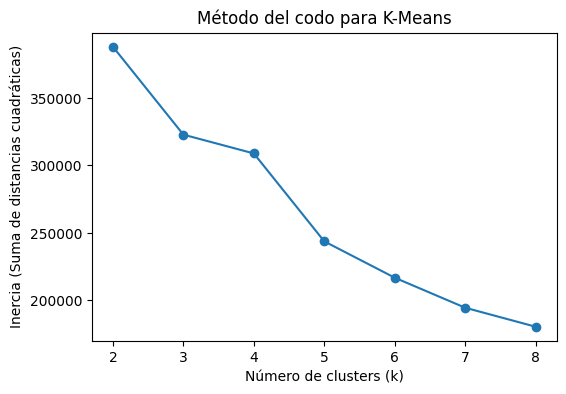

In [13]:
# =========================================================
# 4. MODELING - Método del codo (Elbow)
# =========================================================

inertia = []
K_values = range(2, 9)  # probamos entre 2 y 8 clusters

for k in K_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_values, inertia, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Suma de distancias cuadráticas)")
plt.title("Método del codo para K-Means")
plt.show()


In [14]:
# Elegir el número de clusters según el gráfico del codo
k_optimo = 4  # puedes cambiarlo si ves otro codo más claro

kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
df_prep["CLUSTER_KMEANS"] = kmeans.fit_predict(data_scaled)

df_prep[["CLUSTER_KMEANS"] + features].head()


,CLUSTER_KMEANS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN,AGE_YEARS,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO
0,1,202500.0,406597.5,24700.5,351000.0,0.0,25.920548,2.007889,0.121978
1,2,270000.0,1293502.5,35698.5,1129500.0,0.0,45.931507,4.790750,0.132217
2,0,67500.0,135000.0,6750.0,135000.0,0.0,52.180822,2.000000,0.100000
3,0,135000.0,312682.5,29686.5,297000.0,0.0,52.068493,2.316167,0.219900
4,0,121500.0,513000.0,21865.5,513000.0,0.0,54.608219,4.222222,0.179963


In [15]:
# Centroides en la escala original de las variables
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

centroids_df = pd.DataFrame(centroids, columns=features)
centroids_df["CLUSTER_KMEANS"] = range(k_optimo)
centroids_df.set_index("CLUSTER_KMEANS", inplace=True)

centroids_df


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN,AGE_YEARS,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO
CLUSTER_KMEANS,,,,,,,,
0,145353.014695,3.443388e+05,18083.551918,3.075431e+05,0.020052,54.976382,2.649541,0.142302
1,161084.306032,3.272914e+05,18753.508519,2.929109e+05,0.827746,33.282912,2.257428,0.130531
2,185906.043743,7.717673e+05,34180.203779,6.870721e+05,0.387077,43.412754,5.002787,0.219368
3,201378.100317,1.340881e+06,47799.224477,1.227939e+06,0.409767,46.058520,8.114095,0.284860


Cantidad de clientes por cluster:
CLUSTER_KMEANS
0    18441
1    19825
2    21444
3     8614
Name: count, dtype: int64

Proporción de clientes por cluster:
CLUSTER_KMEANS
0    0.269905
1    0.290162
2    0.313858
3    0.126076
Name: proportion, dtype: float64


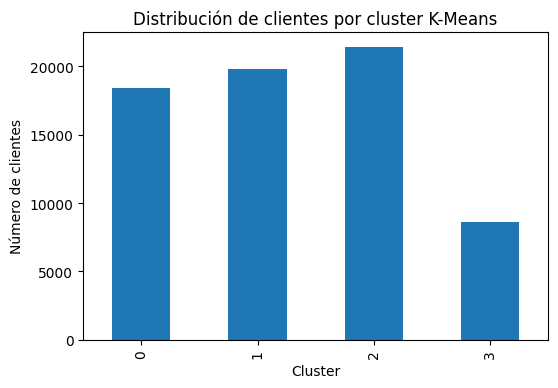

In [16]:
cluster_counts = df_prep["CLUSTER_KMEANS"].value_counts().sort_index()
cluster_counts_pct = df_prep["CLUSTER_KMEANS"].value_counts(normalize=True).sort_index()

print("Cantidad de clientes por cluster:")
print(cluster_counts)
print("\nProporción de clientes por cluster:")
print(cluster_counts_pct)

plt.figure(figsize=(6,4))
cluster_counts.plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Número de clientes")
plt.title("Distribución de clientes por cluster K-Means")
plt.show()


Tasa de impago (TARGET=1) por cluster:
CLUSTER_KMEANS
0    0.063286
1    0.100530
2    0.086784
3    0.054098
Name: TARGET, dtype: float64


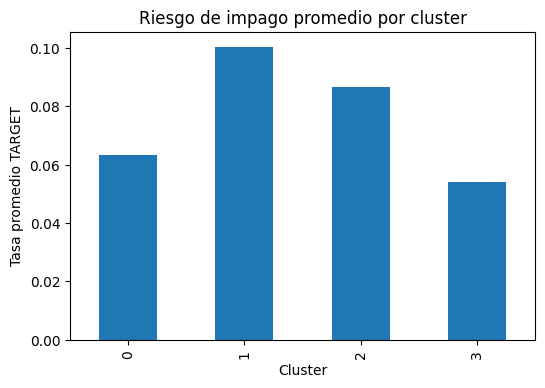

In [17]:
# =========================================================
# 5. EVALUATION - Relación cluster vs TARGET
# =========================================================

if "TARGET" in df_prep.columns:
    riesgo_cluster = df_prep.groupby("CLUSTER_KMEANS")["TARGET"].mean()
    print("Tasa de impago (TARGET=1) por cluster:")
    print(riesgo_cluster)

    plt.figure(figsize=(6,4))
    riesgo_cluster.plot(kind="bar")
    plt.xlabel("Cluster")
    plt.ylabel("Tasa promedio TARGET")
    plt.title("Riesgo de impago promedio por cluster")
    plt.show()
else:
    print("No se encontró la columna TARGET en el dataset.")


In [18]:
perfil_clusters = df_prep.groupby("CLUSTER_KMEANS")[features].mean()
perfil_clusters


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN,AGE_YEARS,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO
CLUSTER_KMEANS,,,,,,,,
0,145345.280757,3.438768e+05,18066.808819,3.070005e+05,0.019957,54.964565,2.645941,0.142169
1,161119.060139,3.274923e+05,18764.041520,2.928197e+05,0.829306,33.278929,2.257895,0.130563
2,185816.844298,7.712751e+05,34157.080442,6.866745e+05,0.385562,43.430113,5.002705,0.219348
3,201425.372966,1.340523e+06,47799.691665,1.227685e+06,0.410262,46.047493,8.108972,0.284773


In [19]:
conclusiones = f"""
6. DEPLOYMENT / CONCLUSIONES
----------------------------

- Se aplicó K-Means sobre el dataset base de aplicaciones (application_.csv),
  utilizando únicamente variables numéricas básicas relacionadas con ingreso,
  monto del crédito, valor del bien, número de hijos, edad y ratios
  financieros.

- El método del codo indicó que un número razonable de clusters es k = {k_optimo},
  permitiendo segmentar la población de clientes en grupos relativamente
  homogéneos.

- Los centroides muestran diferencias claras entre clusters en términos de:
  * nivel de ingreso total,
  * tamaño del crédito solicitado,
  * carga relativa de la cuota (ANNUITY) respecto al ingreso,
  * edad y composición familiar.

- Al relacionar los clusters con la variable TARGET (riesgo de impago), se
  observan diferencias en la tasa promedio de mora entre grupos. Esto indica
  que algunos segmentos de clientes concentran mayor riesgo crediticio que
  otros.

- Esta información puede utilizarse para:
  * Incorporar el número de cluster como variable categórica adicional en el
    modelo de scoring supervisado.
  * Definir estrategias diferenciadas de oferta, límites de crédito y tasas
    según el segmento.
  * Monitorear la estabilidad de la población: cambios en la composición de
    los clusters podrían advertir cambios en el perfil de riesgo.

- Limitaciones:
  * K-Means asume clusters aproximadamente esféricos en el espacio de las
    variables escaladas.
  * Es sensible a la elección de k y a la presencia de outliers.
  * La interpretación requiere combinar conocimiento del negocio y análisis
    de las variables originales.

En general, el método no supervisado aplicado aporta valor al proyecto de
scoring crediticio, al mejorar la comprensión de los segmentos poblacionales
y brindar una herramienta adicional para la toma de decisiones.
"""

print(conclusiones)



6. DEPLOYMENT / CONCLUSIONES
----------------------------

- Se aplicó K-Means sobre el dataset base de aplicaciones (application_.csv),
  utilizando únicamente variables numéricas básicas relacionadas con ingreso,
  monto del crédito, valor del bien, número de hijos, edad y ratios
  financieros.

- El método del codo indicó que un número razonable de clusters es k = 4,
  permitiendo segmentar la población de clientes en grupos relativamente
  homogéneos.

- Los centroides muestran diferencias claras entre clusters en términos de:
  * nivel de ingreso total,
  * tamaño del crédito solicitado,
  * carga relativa de la cuota (ANNUITY) respecto al ingreso,
  * edad y composición familiar.

- Al relacionar los clusters con la variable TARGET (riesgo de impago), se
  observan diferencias en la tasa promedio de mora entre grupos. Esto indica
  que algunos segmentos de clientes concentran mayor riesgo crediticio que
  otros.

- Esta información puede utilizarse para:
  * Incorporar el número